In [89]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import scipy.optimize as scp

In [18]:
path = '$LUSTRE/NEXT100/graph_toy_experiment/prod/toy_exp_*.pt'
files = sorted(glob.glob(os.path.expandvars(path)), key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [72]:
dat_id, nnodes, bloben, binclass = [], [], [], []
for f in files:
    d = torch.load(f)
    for g in d:
        dat_id.append(g.dataset_id)
        nnodes.append(g.num_nodes)
        bloben.append(sorted((g.x[:2].sum().item(), g.x[-2:].sum().item())))
        binclass.append(g.binclass)

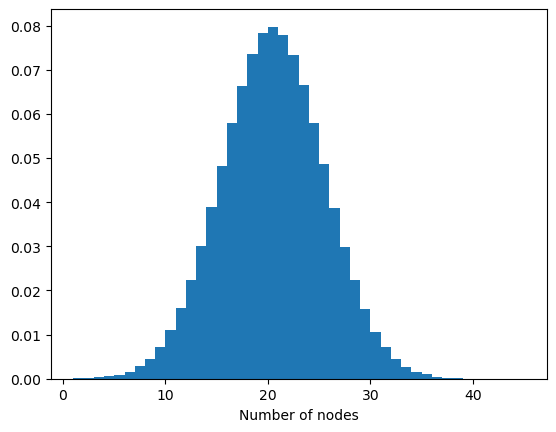

In [108]:
hist = plt.hist(np.array(nnodes), max(nnodes), range=(min(nnodes), max(nnodes) + 1), density=True)
plt.xlabel('Number of nodes')
plt.show()

Maybe is a bit biased bc I cut it in 0 and it expands more than 0... it reaches 44 for example...

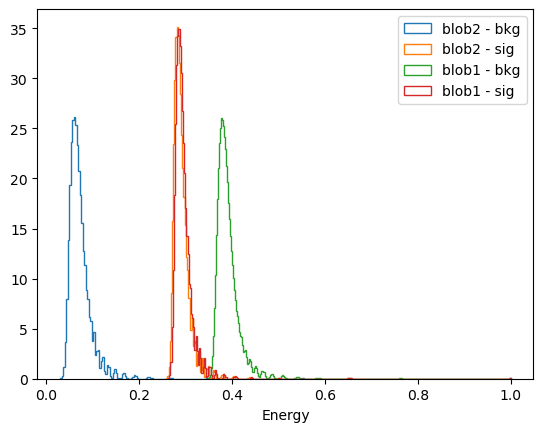

In [130]:
bloben_ = np.array(bloben).T
plt.hist(bloben_[0][~np.array(binclass)], 300, histtype='step', label = 'blob2 - bkg', density=True)
plt.hist(bloben_[0][np.array(binclass)], 300, histtype='step', label = 'blob2 - sig', density=True)

plt.hist(bloben_[1][~np.array(binclass)], 300, histtype='step', label = 'blob1 - bkg', density=True)
plt.hist(bloben_[1][np.array(binclass)], 300, histtype='step', label = 'blob1 - sig', density=True)

plt.xlabel('Energy')
plt.legend()
plt.show()

Tal y como hago la distribución de energía, tiene sentido que el bkg tenga blob1 y blob2 totalmente separados, y signal tenga blob1 y blob2 juntos (en la realidad esto no es así, puede haber una asimetría mayor en blob1 y blob2 para señal pero bueno).

También tiene sentido que los blobs de señal como se reparten estén entre los blobs de background. La forma no gaussiana de los picos entiendo que es pq cortamos la gaussiana en el extremo y luego tb nos limitamos a coger 2 nodos solo, que según la longitud de la traza contendrán más o menos energía, por tanto aparece esta especie de poissoniana

Me preocupa que se distinga tan bien blob1 (creo que en los datos de MC no hay una distinción. Obviamente tan clara tampoco la hay para blob2, pero la hay, y para blob1 pienso que no)

In [129]:
sum(binclass) /len(binclass)

0.299669

In [61]:
blob1en = np.array(bloben).T[0]

In [66]:
blob1en[~np.array(binclass)]

array([0.06599694, 0.14432921, 0.08666934, ..., 0.0628814 , 0.06712576,
       0.05838733])

In [59]:
bloben

[[0.2782608695652174, 0.28515742128935534],
 [0.06599693965804004, 0.3909919499700618],
 [0.14432921154101847, 0.4693524797234411],
 [0.2995120979786916, 0.3063825550134422],
 [0.2799317851231379, 0.2826403169985454],
 [0.0866693354683747, 0.40986122231118227],
 [0.2846195949644226, 0.29034184206598],
 [0.30581604150039904, 0.30965682362330404],
 [0.1510395707578806, 0.47149564050972503],
 [0.05339450761353813, 0.368974000930913],
 [0.07711774107618541, 0.39104954714970697],
 [0.04378295401454982, 0.35847293599412666],
 [0.2734140484290574, 0.27516509905943565],
 [0.2769992993694325, 0.2802021819637674],
 [0.29440888177635527, 0.29490898179635927],
 [0.28840500274054515, 0.29278987493148634],
 [0.05425993985967257, 0.37213498162378883],
 [0.05994495536013962, 0.375109082365577],
 [0.2901978283504388, 0.2960979721354554],
 [0.3601603608118266, 0.36622400400902033],
 [0.11170354572114102, 0.4293521727539322],
 [0.07160395513969076, 0.39531488486296373],
 [0.060705004331312054, 0.37622442

In [38]:
f[0].x[:2].sum().item()

0.28515742128935534

In [34]:
f[0].x

tensor([0.1943, 0.0909, 0.0331, 0.0215, 0.0226, 0.0238, 0.0203, 0.0231, 0.0221,
        0.0202, 0.0202, 0.0209, 0.0199, 0.0226, 0.0219, 0.0226, 0.0233, 0.0208,
        0.0215, 0.0223, 0.0336, 0.0893, 0.1890], dtype=torch.float64)